# ベイズ推定

## ベルヌーイ分布のベイズ推定  
具体例 コイントスの確率推定

In [31]:
import numpy as np
import sympy
import matplotlib.pyplot as plt
from scipy.special import gamma
%matplotlib inline

In [32]:
mu = sympy.Symbol("u")
def posterior(D, prior):
    global mu
    # 尤度
    likelihood = mu**D[0] * (1-mu)**(D[1]-D[0])
    # 事後確率
    post = prior * likelihood
    # 正規化
    post /= sympy.integrate(post, (mu, 0,1))
    return post

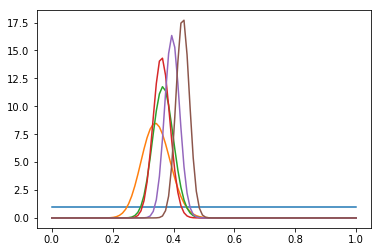

In [33]:
fig = plt.figure(0)
# 事前分布
prior = 1

# 分布のプロット
x = np.linspace(0, 1, 100)
y = [1 for j in x]
plt.plot(x, y)

# 分布の更新 (n: 更新回数)
# 0<=th_min<=th_max<=100
n = 5
th_min = 30
th_max = 60
for i in range(n):
  # サンプリング（コインの表の確率[%]の範囲）
  data = np.random.randint(th_min,th_max)
  
  # 事後分布の計算
  post = posterior((data, 100), prior)
    
  # 事後分布のプロット
  y = [post.subs(mu, j) for j in x]
  plt.plot(x, y)
  prior = post

---

## １変数ガウスのベイズ推定

データの分布パラメータ（正規分布）  

In [34]:
# ガウス分布を作成
def makeGaussian(mu, sig):
    def gaussian(x):
        return np.exp(-(x - mu)**2 / (2*sig)) / np.sqrt(2*np.pi*sig)
    return gaussian

# ガンマ分布を作成
def makeGammaDist(a, b):
    def gammaDist(x):
        return b**a*x**(a-1)*np.exp(-b*x) / gamma(a)
    return gammaDist


### 平均$\mu$未知， 分散$\sigma^2$既知の正規分布の$\mu$についてのベイズ推定

In [35]:
mu_D, sig_D, N = 2, 9, 10000

mu 1.2691676306839295 ==> 1.88479938547 <=> 2
sig 10.900510262780532 ==> 0.29196465179813536


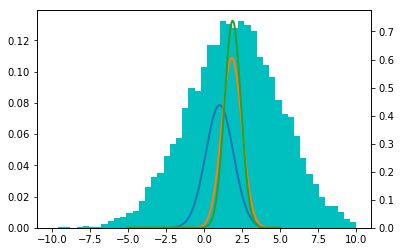

In [36]:
# 見本のサンプル
Xs = np.random.normal(mu_D, sig_D**0.5, N)
fig, ax1 = plt.subplots()
ax1.hist(Xs, bins=np.linspace(-10, 10, 50), normed=True, color="c")  # 見本サンプルのヒストグラム
ax2 = ax1.twinx()

# 事前分布のパラメータ
mu_init, sig_init = np.random.uniform(-5, 5), np.random.uniform(1, 5)**2
Ns = 10  # サンプル数

# 事後分布計算 → 事前分布の更新
mu_prior, sig_prior = mu_init, sig_init
for i in range(3):
    # サンプリング
    Xs = np.random.normal(mu_D, sig_D**0.5, Ns)
    
    # 事後分布計算
    mu_post = sig_D*mu_prior/(Ns*sig_prior+sig_D) + Ns*sig_prior*Xs.mean()/(Ns*sig_prior+sig_D)
    sig_post = (1/sig_prior + Ns/sig_D)**-1
    dist_post = makeGaussian(mu_post, sig_post)
    
    # 事後分布をプロット
    ax2.plot(np.linspace(-5, 5, 1000), dist_post(np.linspace(-5, 5,1000)), linewidth=2)
    
    # 事前分布のパラメータを更新
    mu_prior = mu_post
    sig_prior = sig_post
    
_=ax2.set_ylim(0, )
print("mu", mu_init,  "==>", mu_post, "<=>", mu_D)
print("sig", sig_init,  "==>", sig_post)

### 平均$\mu$既知， 分散$\sigma^2$未知の正規分布の$\mu$についてのベイズ推定

sig: 8.15222255484 <==> 9


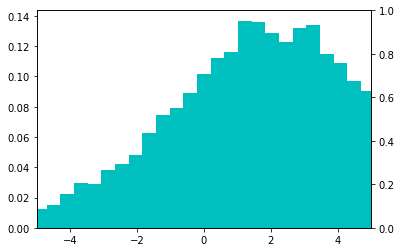

In [37]:
# 見本のサンプル
Xs = np.random.normal(mu_D, sig_D**0.5, N)
fig, ax1 = plt.subplots()
ax1.hist(Xs, bins=np.linspace(-10, 10, 50), normed=True, color="c")  # 見本サンプルのヒストグラム
ax2 = ax1.twinx()

# 事前分布のパラメータ
a_init, b_init = 0, 0  # 無情報事前分布のパラメータ
Ns, n = 50, 50   # サンプル数 and 繰り返し回数

# 事後分布計算 → 事前分布の更新
a_prior, b_prior = a_init, b_init
for i in range(n):
    # サンプリング
    Xs = np.random.normal(mu_D, sig_D**0.5, Ns)
    
    # 事後分布計算
    a_post = a_prior + Ns/2
    b_post = b_prior + Ns*Xs.var()/2;
    dist_post = makeGammaDist(a_post, b_post)
    
    # 事後分布をプロット
    try:
        pass#ax2.plot(np.linspace(eps, 5, 100), dist_post(np.linspace(eps, 5,100)), linewidth=2)
    except:
        a_prior = a_post
        b_prior = b_post
        break
    
    # 事前分布のパラメータを更新
    a_prior = a_post
    b_prior = b_post
    
_=ax2.set_ylim(0, )
_=plt.xlim(-5, 5)

print("sig:", b_post/a_post, "<==>", sig_D)

### 平均$\mu$未知， 分散$\sigma^2$未知の正規分布の$\mu$についてのベイズ推定

1.93784433063 10.0053104689
1.96500897524 31.3679759474


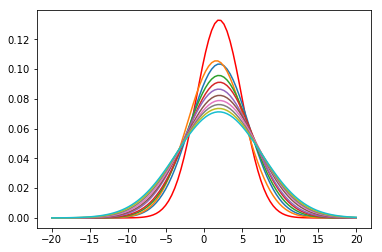

In [40]:
# 事前分布のパラメータ
a_init, b_init, mu_init, l_init = 0,0,np.random.uniform(-5,5),1
Ns, n = 100, 10   # サンプル数 and 繰り返し回数

data_dist = makeGaussian(mu_D, sig_D)
plt.plot(np.linspace(-20, 20, 100), data_dist(np.linspace(-20, 20, 100)), "r")

a_prior, b_prior, mu_prior, l_prior = a_init, b_init, mu_init, l_init
for i in range(n):
    Xs = np.random.normal(mu_D, sig_D**0.5, Ns)
    
    a_post = a_prior + Ns/2
    b_post = ((Xs**2).sum() + l_prior*mu_prior**2) / 2 + b_prior
    mu_post = (Xs.sum() + l_prior*mu_prior) / (Ns + l_prior)
    l_post = Ns + l_prior

    #plt.subplot(122)
    model_dist = makeGaussian(mu_post, b_post/a_post)
    plt.plot(np.linspace(-20, 20, 100), model_dist(np.linspace(-20, 20, 100)), )

    a_prior = a_post
    b_prior = b_post
    mu_prior = mu_post
    l_prior = l_post
    
print(Xs.mean(), Xs.var())
print(mu_post, b_post/a_post)